In [70]:
from math import *
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import plot,show
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans,vq
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "module6"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



In [27]:
files = glob.glob('G:\harsh\ml\practice problems\stock_analysis\module6\datasets\cmpdata/**/*.csv',  
                   recursive = True) 
i=0
for file in files: 
    globals()['data%s' % i]=pd.read_csv(file)
    i=i+1

In [28]:
len(files)

26

In [35]:
df = pd.DataFrame()
df[data0["Symbol"][0]]=data0["Close Price"]
df[data1["Symbol"][0]]=data1["Close Price"]
df[data2["Symbol"][0]]=data2["Close Price"]
df[data3["Symbol"][0]]=data3["Close Price"]
df[data4["Symbol"][0]]=data4["Close Price"]
df[data5["Symbol"][0]]=data5["Close Price"]
df[data6["Symbol"][0]]=data6["Close Price"]
df[data7["Symbol"][0]]=data7["Close Price"]
df[data8["Symbol"][0]]=data8["Close Price"]
df[data9["Symbol"][0]]=data9["Close Price"]
df[data10["Symbol"][0]]=data10["Close Price"]
df[data11["Symbol"][0]]=data11["Close Price"]
df[data12["Symbol"][0]]=data12["Close Price"]
df[data13["Symbol"][0]]=data13["Close Price"]
df[data14["Symbol"][0]]=data14["Close Price"]
df[data15["Symbol"][0]]=data15["Close Price"]
df[data16["Symbol"][0]]=data16["Close Price"]
df[data17["Symbol"][0]]=data17["Close Price"]
df[data18["Symbol"][0]]=data18["Close Price"]
df[data19["Symbol"][0]]=data19["Close Price"]
df[data20["Symbol"][0]]=data20["Close Price"]
df[data21["Symbol"][0]]=data21["Close Price"]
df[data22["Symbol"][0]]=data22["Close Price"]
df[data23["Symbol"][0]]=data23["Close Price"]
df[data24["Symbol"][0]]=data24["Close Price"]
df[data25["Symbol"][0]]=data25["Close Price"]
df['Date'] = data0['Date']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)
df.head()

,ADANIPOWER,AJANTPHARM,AMARAJABAT,APOLLOTYRE,BERGEPAINT,CASTROLIND,CUMMINSIND,DHFL,EXIDEIND,GMRINFRA,...,MRPL,MUTHOOTFIN,NBCC,PNB,RBLBANK,RELINFRA,SUNTV,TATACHEM,TATAPOWER,VOLTAS
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,30.25,1633.50,933.40,231.90,259.5,449.85,1066.05,431.4,245.80,17.55,...,134.2,392.45,197.60,166.80,563.90,605.40,912.20,629.80,83.55,431.85
2017-05-16,32.85,1634.25,924.70,234.40,261.5,443.00,1047.75,1009.9,244.70,17.40,...,131.7,1750.00,198.25,174.15,562.60,611.05,894.70,643.90,83.85,432.45
2017-05-17,33.10,1654.35,937.70,237.35,260.9,439.55,1016.45,1055.2,243.20,17.30,...,135.1,394.80,200.35,165.05,564.25,605.25,887.05,638.10,85.35,430.20
2017-05-18,31.90,1633.40,912.10,232.65,254.1,433.95,1054.45,1070.0,239.85,16.75,...,136.1,1010.00,194.20,158.50,552.15,578.65,871.35,624.90,83.75,414.10
2017-05-19,32.40,1670.25,895.75,234.65,247.8,437.10,972.95,1050.0,238.15,16.95,...,133.6,1750.00,193.55,155.20,555.45,569.55,852.40,616.45,84.15,415.75


In [43]:
df = df.dropna()
returns = df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std() * sqrt(252)
returns

,Returns,Volatility
ADANIPOWER,0.305273,0.610532
AJANTPHARM,-0.173891,0.332171
AMARAJABAT,-0.168654,0.267425
APOLLOTYRE,-0.064303,0.310445
BERGEPAINT,0.108935,0.267668
CASTROLIND,-0.434557,0.446466
CUMMINSIND,-0.177629,0.296544
DHFL,27.851587,8.424197
EXIDEIND,-0.051484,0.262985
GMRINFRA,0.043816,0.479169


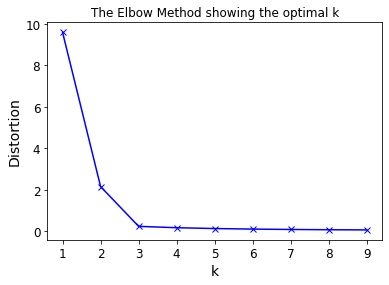

Saving figure The Elbow Method showing this optimal k


<Figure size 432x288 with 0 Axes>

In [53]:
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
save_fig("The Elbow Method showing this optimal k")

Saving figure Plotting  Of Sample Cluster


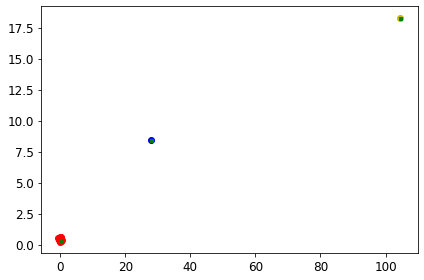

In [60]:
centroids,_ = kmeans(X,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)
save_fig("Plotting  Of Sample Cluster")

In [61]:
print(returns.idxmax())

Returns       MUTHOOTFIN
Volatility    MUTHOOTFIN
dtype: object


In [62]:
returns.drop('MUTHOOTFIN',inplace=True)

data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

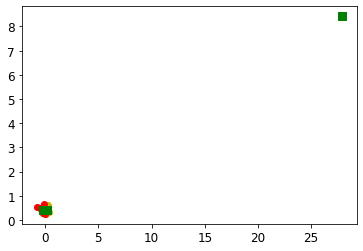

Saving figure Plotting  Of Sample Cluster1


<Figure size 432x288 with 0 Axes>

In [64]:
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()
save_fig("Plotting  Of Sample Cluster1")

In [65]:
print(returns.idxmax())

Returns       DHFL
Volatility    DHFL
dtype: object


In [66]:
returns.drop('DHFL',inplace=True)
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

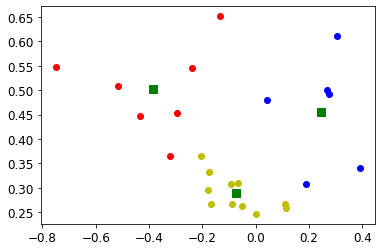

Saving figure final cluster


<Figure size 432x288 with 0 Axes>

In [79]:
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()
save_fig("final cluster")

In [80]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('ADANIPOWER', 0)
('AJANTPHARM', 1)
('AMARAJABAT', 1)
('APOLLOTYRE', 1)
('BERGEPAINT', 1)
('CASTROLIND', 2)
('CUMMINSIND', 1)
('EXIDEIND', 1)
('GMRINFRA', 0)
('GODREJIND', 1)
('IDBI', 2)
('IGL', 2)
('JINDALSTEL', 0)
('JUBLFOOD', 0)
('MINDTREE', 0)
('MRPL', 2)
('NBCC', 2)
('PNB', 2)
('RBLBANK', 1)
('RELINFRA', 2)
('SUNTV', 1)
('TATACHEM', 1)
('TATAPOWER', 1)
('VOLTAS', 0)
